## IRIS FLOWER CLASSIFICATION
#### The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
#### Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Reading Data
Reading data in the form of csv file format and creating a dataset from the csv file. 
Also analyzing the basic information of data like duplicate records and NaN values and other factors.

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
print(df.info())
print(df.describe())
#print(df.value_counts().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


### Visualization of Existing Data Atributes

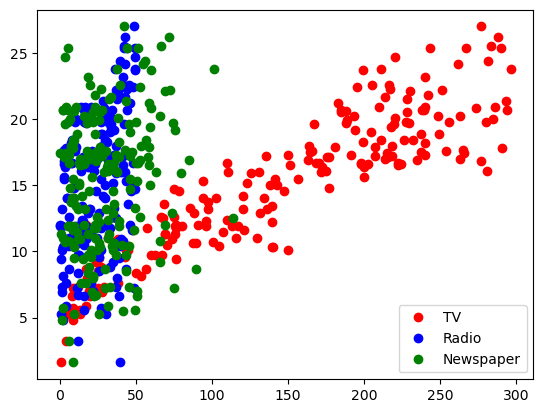

In [4]:
plt.plot(df['TV'].tolist(),df['Sales'].tolist(),'ro')
plt.plot(df['Radio'].tolist(),df['Sales'].tolist(),'bo')
plt.plot(df['Newspaper'].tolist(),df['Sales'].tolist(),'go')
plt.legend(['TV','Radio','Newspaper'])
plt.show()

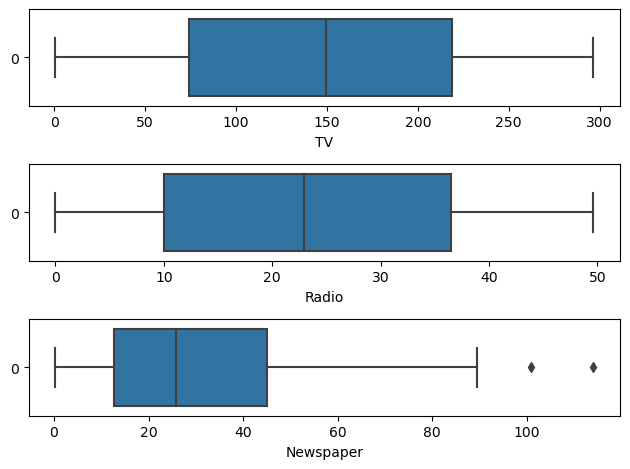

In [5]:
plt.subplot(311)
sns.boxplot(df['TV'],orient='h').set(xlabel='TV')
plt.subplot(312)
sns.boxplot(df['Radio'],orient='h').set(xlabel='Radio')
plt.subplot(313)
sns.boxplot(df['Newspaper'],orient='h').set(xlabel='Newspaper')
plt.tight_layout()

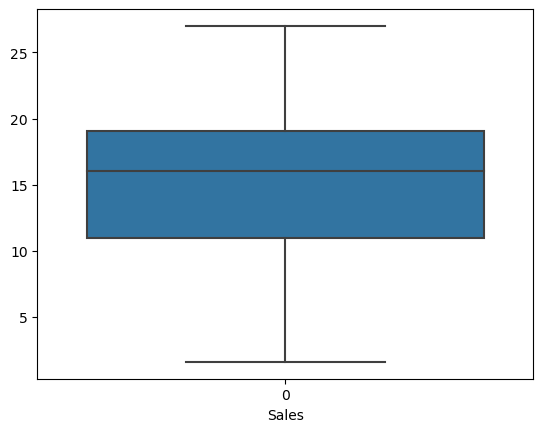

In [6]:
sns.boxplot(df['Sales'],orient='v').set(xlabel='Sales')
plt.show()

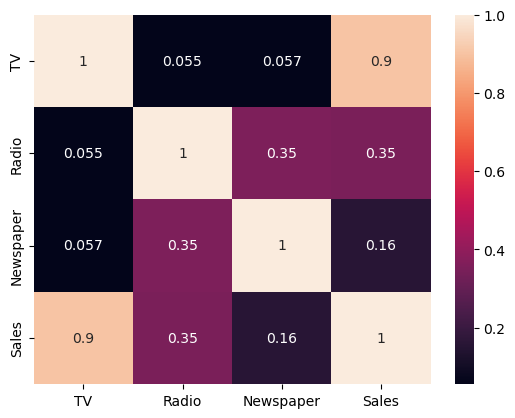

In [7]:
sns.heatmap(df.corr(),annot = True)
plt.show()

#### This shows that highest influencing factor for sales is TV advertisement rather than Radio and Newspaper. Only TV can act as feature alone.

#### Now as we're not using 'Newspaper' as feature so, we can ignore the outliers present in that particular column

## Selecting features and target variables, 
### Training the model (Training model is Linear Regression)

In [8]:
features = ['TV']
target = ['Sales']

In [9]:
x = df['TV'].values
y = df['Sales'].values
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8)

In [10]:
xtrain = xtrain.reshape(-1,1)
ytrain = ytrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)

In [11]:
model = LinearRegression()
model.fit(xtrain,ytrain)
y_train = model.predict(xtrain)
pred = model.predict(xtest)

## Training Visualization
#### This is visual representatiion of model predicted result and actual result present in training dataset.

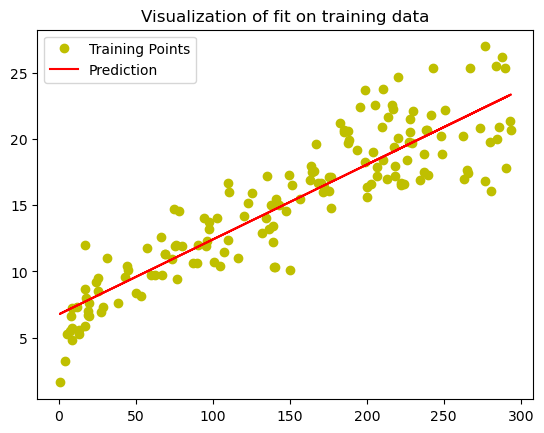

In [12]:
plt.plot(xtrain,ytrain,'yo')
plt.plot(xtrain,y_train,'r')
plt.legend(['Training Points','Prediction'])
plt.title("Visualization of fit on training data")
plt.show()

## Testing Visualization
#### This is visual representatiion of model predicted result and actual result present in testing dataset.

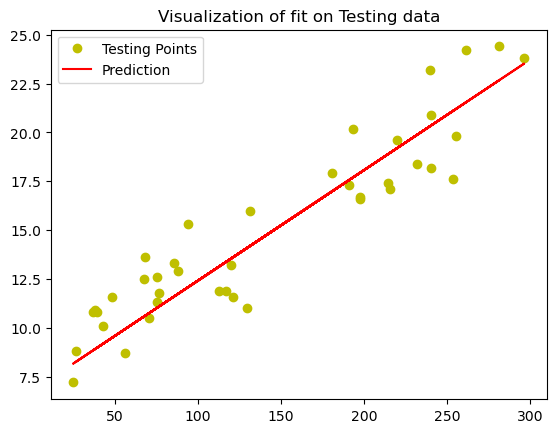

In [13]:
plt.plot(xtest,ytest,'yo')
plt.plot(xtest,pred,'r')
plt.legend(['Testing Points','Prediction'])
plt.title("Visualization of fit on Testing data")
plt.show()

### Analyzing and visualizing the error terms and Calculating the MSE values (Mean squared Error Values)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17832\3743597598.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytrain-y_train)


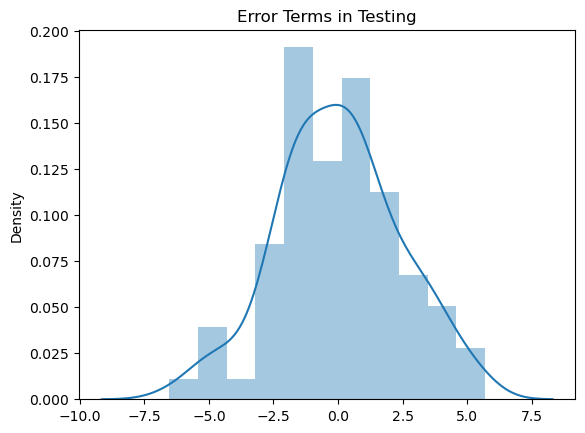

In [14]:
sns.distplot(ytrain-y_train)
plt.title("Error Terms in Testing")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17832\4267440355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytest-pred)


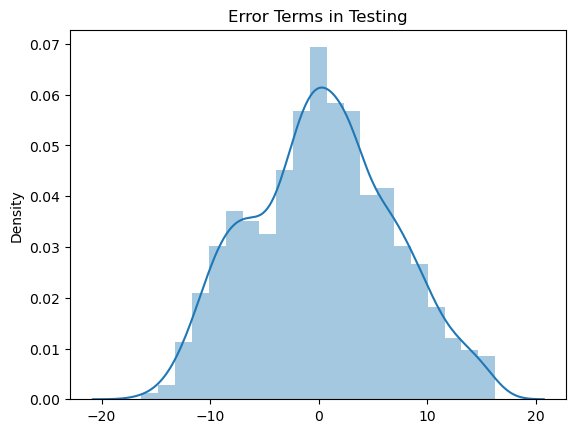

In [15]:
sns.distplot(ytest-pred)
plt.title("Error Terms in Testing")
plt.show()

In [16]:
print('MSE on Train Data',np.sqrt(mean_squared_error(ytrain,y_train)))
print('MSE on Test Data',np.sqrt(mean_squared_error(ytest,pred)))

MSE on Train Data 2.3975029782345634
MSE on Test Data 1.7771535350607437
